# S15 T01: Classifica els diferents vols

## Nivell 1

### *Exercici 1*

Classifica els diferents vols utilitzant l'algorisme de K-means.

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv

%matplotlib inline
import matplotlib.pyplot as plt

from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
retards_df = pd.read_csv('DelayedFlights.csv')

In [3]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
retards_df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

+ *Comprovades les variables que contenen null values, per tal de conservar el màxim d'observacions/dades que ofereix el 
   dataset; decideixo substituïr-los per la mean de cada una de les variables*

In [5]:
air_time_mean = retards_df['ArrTime'].mean()
retards_df['ArrTime'].fillna(air_time_mean, inplace=True)

In [6]:
retards_df['TailNum'].fillna(method ='pad', inplace = True)

In [7]:
aelaps_time_mean = retards_df['ActualElapsedTime'].mean()
retards_df['ActualElapsedTime'].fillna(air_time_mean, inplace=True)

In [8]:
crseelaps_time_mean = retards_df['CRSElapsedTime'].mean()
retards_df['CRSElapsedTime'].fillna(crseelaps_time_mean, inplace=True)

In [9]:
crseelaps_time_mean = retards_df['AirTime'].mean()
retards_df['AirTime'].fillna(crseelaps_time_mean, inplace=True)

In [10]:
arrdelay_time_mean = retards_df['ArrDelay'].mean()
retards_df['ArrDelay'].fillna(arrdelay_time_mean, inplace=True)

In [11]:
taxiin_time_mean = retards_df['TaxiIn'].mean()
retards_df['TaxiIn'].fillna(taxiin_time_mean, inplace=True)

In [12]:
taxiout_time_mean = retards_df['TaxiOut'].mean()
retards_df['TaxiOut'].fillna(taxiout_time_mean, inplace=True)

In [13]:
carrierdelay_time_mean = retards_df['CarrierDelay'].mean()
retards_df['CarrierDelay'].fillna(carrierdelay_time_mean, inplace=True)

In [14]:
weatherdelay_time_mean = retards_df['WeatherDelay'].mean()
retards_df['WeatherDelay'].fillna(weatherdelay_time_mean, inplace=True)

In [15]:
nasdelay_time_mean = retards_df['NASDelay'].mean()
retards_df['NASDelay'].fillna(nasdelay_time_mean, inplace=True)

In [16]:
securitydelay_time_mean = retards_df['SecurityDelay'].mean()
retards_df['SecurityDelay'].fillna(securitydelay_time_mean, inplace=True)

In [17]:
aircraftdelay_time_mean = retards_df['LateAircraftDelay'].mean()
retards_df['LateAircraftDelay'].fillna(aircraftdelay_time_mean, inplace=True)

In [18]:
retards_df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.000000,0.000000,0.000000,0.000000,32.000000
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *I comprovo que ja no hi ha cap null value*

In [19]:
retards_df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [20]:
retards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

+ *Em desfaig de les columnes amb valors no numèrics EXCEPTE "UniqueCarrier" (__que em servirà per fer un sample estratificat
  i reduïr el número d'observacions del Data Frame, mantenint la representivitat de cada companyia aeria__), de "Unnamed: 0" 
  que sembla un índex afegit al del DataFrame, , de totes   les variables amb valors numerics que NO estiguin expresades en 
  minuts; i de "Cancelled" i "Diverted" que són variables categòriques convertides i tractades de forma binaria(0, 1)*
    
  *El propòsit és quedar-me només amb les variables expresades en minuts, confiant en que podrà ser més efectiu l'algorisme
   de Clustering*

In [21]:
retards_df.drop(retards_df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 17, 18, 19, 22, 23, 24]], axis = 1, inplace = True)

In [22]:
retards_df

,UniqueCarrier,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,WN,-14.0,8.0,4.0,8.0,19.179399,3.703571,15.021635,0.090137,25.296466
1,WN,2.0,19.0,5.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
2,WN,14.0,8.0,3.0,17.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,WN,34.0,34.0,3.0,10.0,2.000000,0.000000,0.000000,0.000000,32.000000
4,WN,11.0,25.0,4.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
...,...,...,...,...,...,...,...,...,...,...
1936753,DL,25.0,30.0,9.0,18.0,3.000000,0.000000,0.000000,0.000000,22.000000
1936754,DL,75.0,57.0,15.0,34.0,0.000000,57.000000,18.000000,0.000000,0.000000
1936755,DL,99.0,80.0,8.0,32.0,1.000000,0.000000,19.000000,0.000000,79.000000
1936756,DL,9.0,11.0,13.0,13.0,19.179399,3.703571,15.021635,0.090137,25.296466


+ *Aprofito la variable "UniqueCarrier" per fer un  sample estratificat de 500 observacions, per millor agilitat de 
  l'ordinador*

In [23]:
# defineixo el sample size que vull
N = 500

# genero una nou dataset amb el random sample estratificat
retards2_df = retards_df .groupby('UniqueCarrier', group_keys=False).apply(lambda x: x.sample(int(np.rint(N*len(x)/len(retards_df))))).sample(frac=1).reset_index(drop=True)

In [24]:
retards2_df

,UniqueCarrier,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,OO,30.0,38.0,4.0,16.0,0.000000,0.000000,0.000000,0.000000,30.000000
1,AA,16.0,19.0,4.0,13.0,0.000000,0.000000,3.000000,0.000000,13.000000
2,YV,3.0,13.0,8.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,WN,87.0,99.0,5.0,7.0,0.000000,0.000000,0.000000,9.000000,78.000000
4,US,18.0,17.0,6.0,34.0,13.000000,0.000000,1.000000,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...,...
493,DL,4.0,6.0,6.0,14.0,19.179399,3.703571,15.021635,0.090137,25.296466
494,OO,60.0,60.0,4.0,14.0,60.000000,0.000000,0.000000,0.000000,0.000000
495,DL,-4.0,15.0,7.0,23.0,19.179399,3.703571,15.021635,0.090137,25.296466
496,XE,22.0,18.0,11.0,18.0,0.000000,18.000000,4.000000,0.000000,0.000000


+ *I ara em desfaig de "UniqueCarrier"

In [25]:
retards2_df.drop(['UniqueCarrier'], axis = 1, inplace = True)

In [26]:
retards2_df

,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,30.0,38.0,4.0,16.0,0.000000,0.000000,0.000000,0.000000,30.000000
1,16.0,19.0,4.0,13.0,0.000000,0.000000,3.000000,0.000000,13.000000
2,3.0,13.0,8.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,87.0,99.0,5.0,7.0,0.000000,0.000000,0.000000,9.000000,78.000000
4,18.0,17.0,6.0,34.0,13.000000,0.000000,1.000000,0.000000,4.000000
...,...,...,...,...,...,...,...,...,...
493,4.0,6.0,6.0,14.0,19.179399,3.703571,15.021635,0.090137,25.296466
494,60.0,60.0,4.0,14.0,60.000000,0.000000,0.000000,0.000000,0.000000
495,-4.0,15.0,7.0,23.0,19.179399,3.703571,15.021635,0.090137,25.296466
496,22.0,18.0,11.0,18.0,0.000000,18.000000,4.000000,0.000000,0.000000


+ *Per un millor funcionament de l'algorisme, és molt convenient escalar les dades. En aquest cas fem un feature scaling
   d'estandarització amb "StandardScaler()"; que farà que les dades quedin escaldes perquè cada variable tingui una mean 
   = 0, i una desviació standard = 1*

In [27]:
scaler = StandardScaler()
scaled_retards_df = scaler.fit_transform(retards2_df)

+ *Comprovem que les variables han quedat standaritzades adeqüadament"

In [28]:
type(scaled_retards_df)

numpy.ndarray

In [29]:
scaled_retards_df[ :, 1].mean()

-1.1592690216969505e-17

In [30]:
scaled_retards_df[ : , 1].std()

0.9999999999999999

In [31]:
scaled_retards_df[ : , 5].mean()

-1.4267926420885545e-17

In [32]:
scaled_retards_df[ : , 5].std()

0.9999999999999999

In [33]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [34]:
kmeans.fit(scaled_retards_df)

KMeans(init='random', n_clusters=3, random_state=42)

+ *Obtenim estadístics*

In [35]:
# El valor de SSE més baix
kmeans.inertia_

3194.6585196358446

In [36]:
# Posició final del Centroids de cada Cluster
kmeans.cluster_centers_

array([[ 0.98122432,  1.04263765, -0.02970493,  0.0352728 , -0.38711212,
        -0.15126237, -0.26442922,  0.10044596,  2.0326981 ],
       [ 2.72378857,  2.36483634,  1.13920691,  1.2294127 ,  1.54635842,
         1.05694641,  2.50605455, -0.10610763, -0.68091675],
       [-0.34579176, -0.33083176, -0.07399253, -0.0906575 , -0.04477962,
        -0.04879616, -0.13081884, -0.00878512, -0.27915977]])

In [37]:
# Número de iteracions per convergir al resultat final
kmeans.n_iter_

12

+ *Fem una ullada als valors/clusters per les 20 primeres observacions*

In [38]:
kmeans.labels_[:20]

array([2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2])

+ *Comprovo que hi són els valors d'assignació pels 3 clusters que hem definit el el model Kmeans*

In [39]:
np.unique(kmeans.labels_)

array([0, 1, 2])

+ *I amb el mòdul "collections" podré comprovar quantes observacions queden assignades a cada Cluster*

In [40]:
import collections

In [41]:
counter = collections.Counter(kmeans.labels_)

In [42]:
print(counter)

Counter({2: 405, 0: 65, 1: 28})


+ *Obtenim el silhouette_score que és la mesura de com han quedat de cohesionats i separats els Clusters*
  *El valor pot anar des de -1 fins a 1 *

In [43]:
kmeans_silhouette = silhouette_score(scaled_retards_df
      , kmeans.labels_
    ).round(2)

In [44]:
kmeans_silhouette

0.43

+ *I fem una reducció de dimensions amb PCA per visualitzar els clusters generats d'acord amb els 2 components principals que 
   definim*

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(2)

In [47]:
#Transformem les dades
df = pca.fit_transform(scaled_retards_df)
 
df.shape

(498, 2)

In [50]:
#Fem una predicció dels valors d'assignació als diferents clusters
label = kmeans.fit_predict(df)
 
print(label)

[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 2 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 2 2 1 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 1 1 1 0 1 1 2 1 1 1 1 1 1 2
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 0 0 1 1 1 1 1 

+ *Visualitzem els clusters generats, amb els seus centroids*

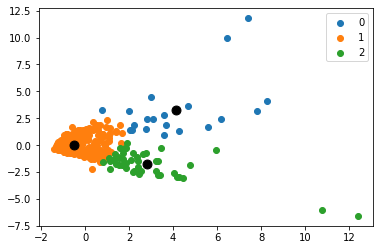

In [51]:
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

+ *Eixisteixen dos mètodes per evaluar el número de clusters adeqüat a través de visualitzacions*

__1.- ELBOW METHOD :__ 

In [52]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# Generem una llista on incloure els valors de SSE per cada k (número de Clusters)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_retards_df)
    sse.append(kmeans.inertia_)

C:\Users\Enric\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


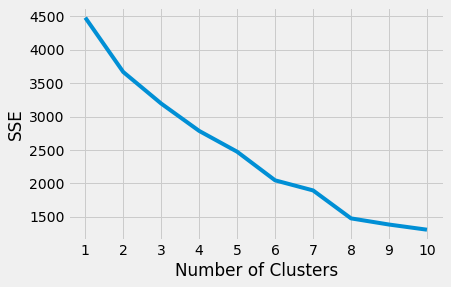

In [53]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

+ *A vegades la curva no ens assenyala amb molta claredat el "colze"; on es manifesta la combinació raonable entre
   SSE i número de Clusters*
   
   *Per aixó utilitzem el mòdul "Knedd" amb el que podem determinar el elbow point*

In [54]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

8

+ *__Segons el mètode "Elbow" el número de Clusters més adient és 8__*

__1.- SILHOUETTE COEFFICIENT :__ 

*Es una mesura de la cohesió i separació dels Clusters.(de -1 a 1)

In [55]:
# Generem un allista amb els valors de Silhouette_coefficients per cada k (número de Clusters)
silhouette_coefficients = []


for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_retards_df)
    score = silhouette_score(scaled_retards_df, kmeans.labels_)
    silhouette_coefficients.append(score)

In [56]:
silhouette_coefficients

[0.5857839093796238,
 0.4284210731245987,
 0.43821078536829217,
 0.41221666353593606,
 0.41917464956394723,
 0.34188204202798705,
 0.353870733409628,
 0.359382745523701,
 0.35840987982321726]

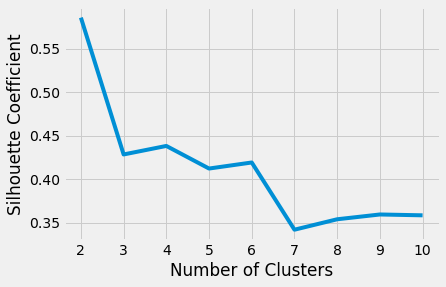

In [57]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

+ *__Segons el mètode "Silhouette_coeficcients" el número de Clusters més adient és 2 (i potser 4)__ *

+ *Estudiem el comportament del clustering amb k = 8, tal com hem evaluat amb el mètode "Elbow"*


In [58]:
kmeans = KMeans(
    init="random",
    n_clusters=8,
    n_init=10,
    max_iter=300,
    random_state=42
)
 

label = kmeans.fit_predict(scaled_retards_df)
 
print(label)

[3 3 3 2 3 3 3 1 3 3 1 2 3 3 3 7 4 3 3 3 4 3 6 3 3 3 3 3 3 4 3 3 3 4 6 3 3
 1 7 3 3 1 3 3 3 7 1 1 3 3 4 3 3 7 3 3 3 3 3 4 3 4 3 4 5 3 3 3 3 5 3 3 3 3
 3 4 3 3 6 3 3 3 6 3 3 3 1 4 3 3 3 3 3 4 3 3 3 4 6 1 3 3 4 6 1 4 3 3 3 3 3
 1 6 3 3 3 4 3 1 3 4 3 3 3 6 7 3 3 3 3 0 6 3 3 6 3 3 1 3 3 3 3 1 3 3 3 6 3
 3 3 1 3 3 3 6 1 3 4 3 3 4 3 3 3 3 3 3 1 3 4 3 4 3 1 1 6 3 4 3 3 1 3 3 3 3
 6 3 3 3 1 4 6 3 3 1 4 3 3 3 4 4 3 3 1 3 3 3 3 3 3 3 7 1 1 3 3 3 6 4 1 3 3
 6 3 1 3 3 3 1 3 3 3 3 4 4 3 5 3 1 3 1 3 1 4 4 3 1 3 1 3 3 3 3 4 3 1 7 4 3
 4 4 3 3 6 3 3 3 3 6 3 3 1 3 3 6 3 3 3 5 3 3 3 3 3 3 4 3 4 4 3 3 3 1 3 3 3
 3 1 3 3 3 3 1 3 3 6 3 3 1 4 6 3 3 4 4 3 1 3 1 4 3 3 3 3 3 6 3 3 4 3 4 6 4
 1 1 4 3 3 3 3 3 6 3 3 6 3 1 4 1 4 3 3 4 4 3 3 3 4 1 3 3 6 3 3 7 3 4 3 6 1
 4 4 4 3 3 4 3 3 4 3 6 4 1 3 4 3 5 6 4 3 3 4 6 4 3 3 3 4 1 3 6 6 3 3 6 3 3
 3 3 6 3 3 3 1 3 3 3 4 3 3 3 4 5 3 3 3 3 3 1 1 4 3 3 7 3 1 6 3 3 6 3 4 4 1
 4 3 5 3 6 3 3 4 4 3 3 4 3 3 6 3 4 4 3 4 3 3 1 4 3 5 3 3 3 3 3 3 3 3 3 3 1
 3 4 0 1 4 5 7 1 3 3 1 3 

+ *Visualitzem el que hem obtingut*

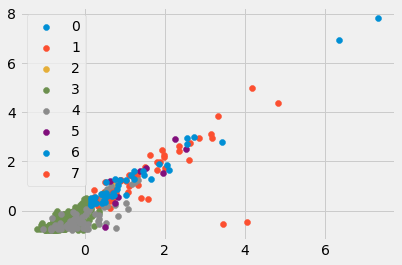

In [59]:
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(scaled_retards_df[label == i , 0] , scaled_retards_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [60]:
kmeans_silhouette = silhouette_score(scaled_retards_df
      , kmeans.labels_
    ).round(2)

In [61]:
kmeans_silhouette

0.35

+ __*Estudiem el comportament del clustering amb k = 2, tal com hem evaluat amb el mètode "Silhouette Coefficient"*__

In [62]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)
 

label = kmeans.fit_predict(scaled_retards_df)
 
print(label)

[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 1 1 1 1 

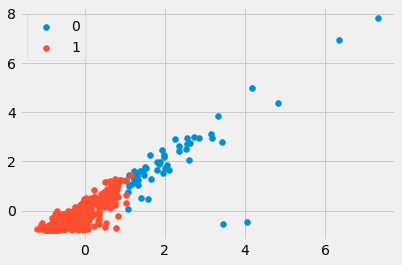

In [63]:
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(scaled_retards_df[label == i , 0] , scaled_retards_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [64]:
kmeans_silhouette = silhouette_score(scaled_retards_df
      , kmeans.labels_
    ).round(2)

In [65]:
kmeans_silhouette

0.59

+ __*Comparem el comportament del clustering amb k = 4, tal com hem vist abans amb el mètode "Silhouette Coefficient"*__

In [66]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
)
 

label = kmeans.fit_predict(scaled_retards_df)
 
print(label)

[2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 0 2 2 1 2 2 2 0 1 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2
 1 0 2 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2
 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 2
 0 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 0 1 1 2 2 2 2 2 1 2 2
 0 2 1 2 2 2 1 2 2 2 2 2 2 2 3 2 1 2 1 2 1 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 2
 1 0 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 1 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 1 1 2 2 2 2 2 2 0 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 0 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 3 2 2 2 2 2 0 1 2 2 2 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 2 2 2 2 2 1 1 2 2 2 0 2 1 1 2 2 2 2 2 2 1
 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 3 2 2 2 2 2 2 2 2 2 2 1
 2 2 0 1 2 3 0 1 2 2 1 2 

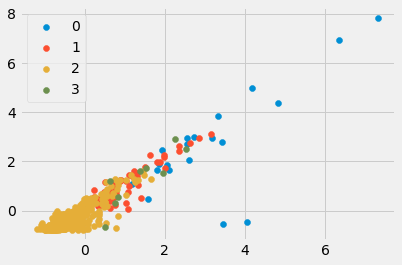

In [67]:
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(scaled_retards_df[label == i , 0] , scaled_retards_df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [68]:
kmeans_silhouette = silhouette_score(scaled_retards_df
      , kmeans.labels_
    ).round(2)

In [69]:
kmeans_silhouette

0.44

+ *__Comprovem que el valor de Silhouette_coefficient ha millorat amb K= 4 però encara més amb k = 2__*

## Nivell 2

### *Exercici 2*

Classifica els diferents vols utilitzant l'algorisme de clustering jeràrquic.

### OPCIÓ 1 : Fent el dendrograma i visualitzant clusters  sense aplicar PCA amb dades normalitzades

In [70]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

In [72]:
data_normalized = normalize(retards2_df)
data_normalized = pd.DataFrame(retards2_df, columns = retards2_df.columns)

In [73]:
data_normalized.head()

,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,30.0,38.0,4.0,16.0,0.000000,0.000000,0.000000,0.000000,30.000000
1,16.0,19.0,4.0,13.0,0.000000,0.000000,3.000000,0.000000,13.000000
2,3.0,13.0,8.0,10.0,19.179399,3.703571,15.021635,0.090137,25.296466
3,87.0,99.0,5.0,7.0,0.000000,0.000000,0.000000,9.000000,78.000000
4,18.0,17.0,6.0,34.0,13.000000,0.000000,1.000000,0.000000,4.000000


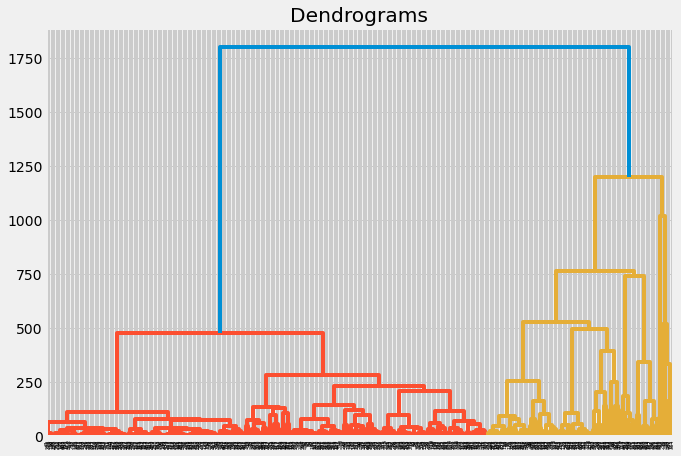

In [77]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_normalized, method='ward'))

In [78]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_normalized)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,

+ *Visualitzem els clusters generats a partir de les variables "DepDelay" i "TaxiOut"*


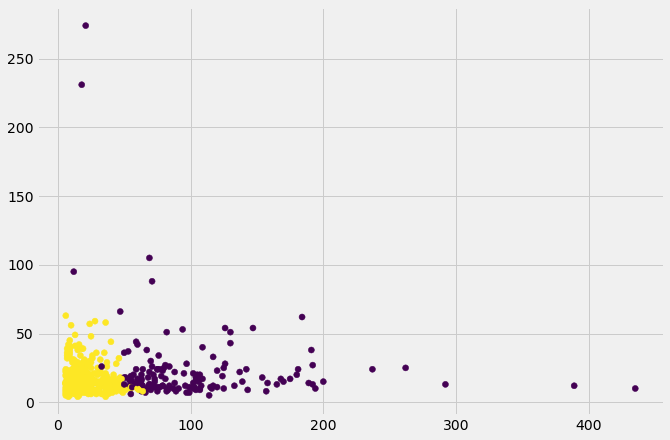

In [80]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_normalized['DepDelay'], data_normalized['TaxiOut'], c=cluster.labels_)

+ *I obtenim el silhouette_score*

In [81]:
kmeans_silhouette = silhouette_score(
      data_normalized, kmeans.labels_
    ).round(2)
    

In [82]:
kmeans_silhouette

0.52

### OPCIÓ 2 : Fent el dendrograma i la visualització després d' aplicar PCA amb dades escalades i normalitzades

In [83]:
# Comencem per estandaritzar les dades del nostre Data Frame original
scaler = StandardScaler()
X_scaled = scaler.fit_transform(retards2_df)

In [84]:
# I ara normalitzem les dades prèviament estandaritzades
X_normalized = normalize(X_scaled)

In [85]:
type(X_normalized)

numpy.ndarray

In [86]:
# Convertim en Data Frame 
X_normalized = pd.DataFrame(X_normalized)

+ *__Apliquem un PCA per reduïr la dimensionalitat a 2__*

In [88]:
pca = PCA(n_components = 2)

In [89]:
#Transformem les dades 
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

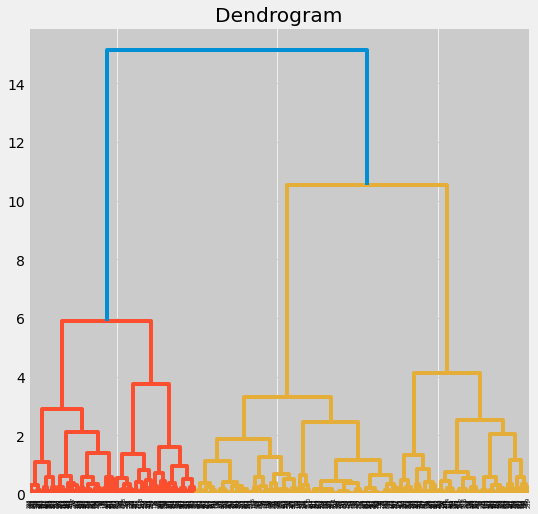

In [91]:
plt.figure(figsize =(8, 8))
plt.title('Dendrogram')
Dendrogram = sch.dendrogram((sch.linkage(X_principal, method ='ward')))

+ *Veien el dendrograma podriem tenir un dubte: marquem la línia horitzontal a y = 8 (són 3 clusters) o a y = 12 (són 2)*

  *Estudiem quina opció pot ser la millor, visualitzant els diferents números de clusters*

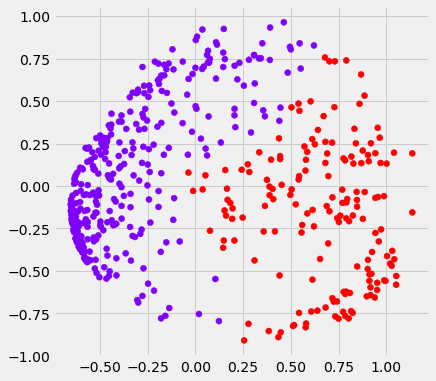

In [92]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

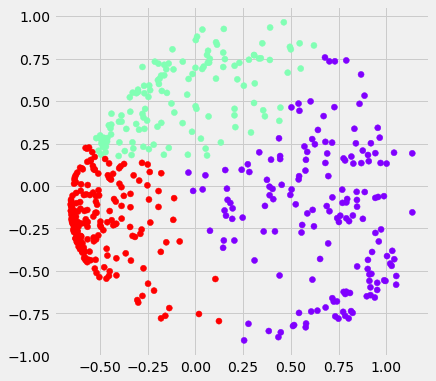

In [93]:
k = 3

ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

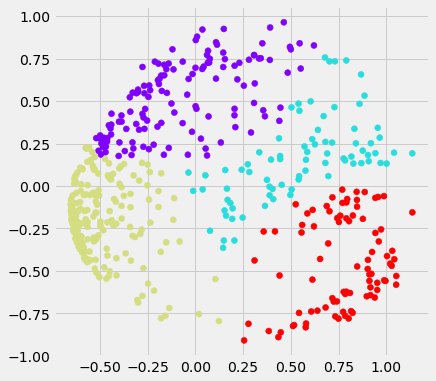

In [94]:
k = 4

ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

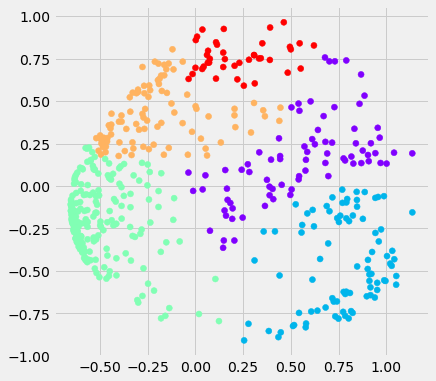

In [95]:
k = 5

ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

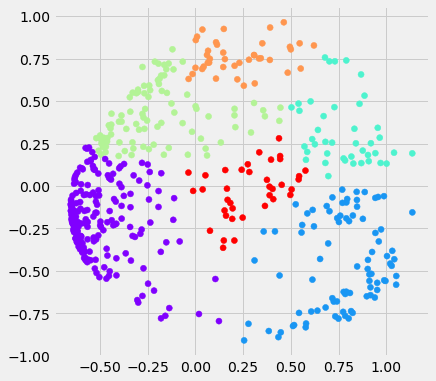

In [96]:
k = 6

ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

+ *Ara podrem evaluar els diferents models i visualitzar els resultats amb un barplot*

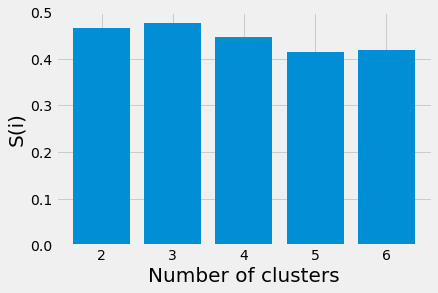

In [97]:
k = [2, 3, 4, 5, 6]
  
# Generem una llista de silhouette_scores.
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
  
# Generem la visualització dels resultats obtinguts en funció de k
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [98]:
print(silhouette_scores)

[0.46571286473854784, 0.47665520092605645, 0.4458861823255827, 0.41366900043305516, 0.4182644048857552]


+ *__Veiem que amb k = 3 el valor és una mica millor que amb k = 2__*